#Supervised Classification: Decision Trees, SVM, and Naive Bayes|Assignment

Question 1 : What is Information Gain, and how is it used in Decision Trees?
 - Information Gain (IG) is a key concept in Decision Trees, used to decide which feature (attribute) should be used to split the data at each step of tree construction. It measures how well a given feature separates the training examples according to their target classes.

 **Definition**

Information Gain is based on the concept of Entropy — a measure of impurity or uncertainty in the data.

The Information Gain (IG) of an attribute
𝐴 is defined as:
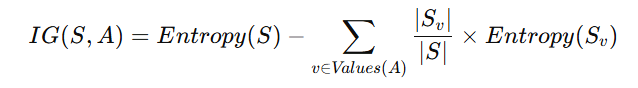

where:

𝑆= the set of training examples

𝐴 = the attribute being evaluated

𝑆𝑣 = the subset of
𝑆for which attribute
𝐴
 has value
𝑣

∣
𝑆
𝑣
∣
/
∣
𝑆
∣
 = the proportion of examples having value
𝑣
 for attribute
𝐴


𝐸𝑛𝑡𝑟𝑜𝑝𝑦(𝑆) = measure of impurity in the dataset 𝑆

Entropy Formula

For a binary classification problem (two classes: positive and negative):
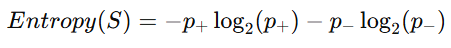

where:

𝑝
+= proportion of positive examples in
𝑆

𝑝
−= proportion of negative examples in 𝑆


Entropy is 0 if all examples belong to one class (pure set),
and 1 if examples are equally mixed (maximum uncertainty).

Intuition

High Entropy → Data is very mixed (high uncertainty)

Low Entropy → Data is more pure (low uncertainty)

Information Gain tells us how much uncertainty (entropy) is reduced after splitting the data on a particular attribute.

Thus:

Attribute with highest Information Gain is chosen for the split at each node.

Example

1.Suppose we’re classifying whether a person buys a computer (Yes/No) based on attributes like Age, Income, etc.

2.Compute the Entropy of the entire dataset (before any split).

3.For each attribute (e.g., Age), split the dataset by its values (e.g., “Young”, “Middle-aged”, “Old”).

4.Compute the weighted average entropy after the split.

5.Subtract this from the original entropy → gives Information Gain.

6.Choose the attribute with maximum IG for the root node

Use in Decision Tree Algorithms

ID3 Algorithm: Uses Information Gain to select attributes.

C4.5 Algorithm: Uses Gain Ratio (a normalized version of IG).

CART Algorithm: Uses Gini Index instead of IG.


Question 2: What is the difference between Gini Impurity and Entropy?
 - The difference between Gini Impurity and Entropy:
# **Gini Impurity**
 -  **What it is**: Measures the probability of incorrectly classifying a randomly chosen element if it was labeled according to the class distribution.
 - **Range**: \(0\) to \(0.5\) for binary classification. \(0\) indicates a perfect split (no impurity), while \(0.5\) indicates maximum impurity (a 50/50 split).
 - **Calculation**: Less computationally expensive because it does not involve logarithmic functions.
 - **Behavior**: Tends to favor the most frequent class, resulting in a more "pure" node in the split.
 - Formula: 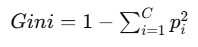

#  **Entropy**
 - **What it is**: Measures the disorder or randomness in a dataset. It is a logarithmic measure.

 - **Range**: \(0\) to \(1\) for binary classification. \(0\) indicates perfect purity, and \(1\) indicates maximum impurity.
 - **Calculation**: More computationally expensive due to the use of logarithmic functions
 - **Behavior**: Tends to create more balanced trees by measuring uncertainty.
 - **Formula**:
 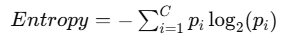



Question 3:What is Pre-Pruning in Decision Trees?
 -  Pre-Pruning (also called Early Stopping) is a technique used in Decision Tree algorithms to limit the growth of the tree during its construction — in order to prevent overfitting and improve generalization to unseen data.
 It means stopping the tree from splitting further if the next split does not provide a significant improvement in model performance.

 **Why It’s Needed**

Decision trees tend to grow deep and complex, perfectly fitting the training data (zero training error) — but such trees perform poorly on new data because they overfit.

Pre-pruning prevents this by applying constraints during tree building.

**Example**

Suppose a dataset has 100 samples.
If we set:


```
# DecisionTreeClassifier(min_samples_split=10)

```
Then, any node containing fewer than 10 samples will not be split further — this is pre-pruning.

**Common Pre-Pruning Parameters**

| Parameter               | Meaning                                            |
| ----------------------- | -------------------------------------------------- |
| `max_depth`             | Maximum depth of the tree                          |
| `min_samples_split`     | Minimum number of samples required to split a node |
| `min_samples_leaf`      | Minimum number of samples required at a leaf node  |
| `max_leaf_nodes`        | Maximum number of leaf nodes allowed               |
| `min_impurity_decrease` | Minimum decrease in impurity required for a split  |



Question 4:Write a Python program to train a Decision Tree Classifier using Gini
Impurity as the criterion and print the feature importances (practical).

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Load a sample dataset (Iris dataset)
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the Decision Tree Classifier using Gini Impurity
clf = DecisionTreeClassifier(criterion='gini', random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Print model accuracy
print("Model Accuracy on Test Data:", clf.score(X_test, y_test))

# Print feature importances
print("\nFeature Importances:")
for feature_name, importance in zip(iris.feature_names, clf.feature_importances_):
    print(f"{feature_name}: {importance:.4f}")


Model Accuracy on Test Data: 1.0

Feature Importances:
sepal length (cm): 0.0000
sepal width (cm): 0.0191
petal length (cm): 0.8933
petal width (cm): 0.0876


Question 5: What is a Support Vector Machine (SVM)?
-  A Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks — though it’s mostly used for classification.

It’s a powerful and widely used algorithm because it works well even with high-dimensional data and aims to find the optimal boundary (decision line or hyperplane) that separates different classes in the dataset.

 - **Basic Idea**

SVM tries to find the best possible boundary (called a hyperplane) that:

Clearly separates the data points of different classes, and

Maximizes the margin, i.e., the distance between the hyperplane and the nearest data points of each class.

These closest points are called Support Vectors.
- **Key Concepts**

a. Hyperplane

It’s the decision boundary that separates classes.

In:

2D → it’s a line

3D → it’s a plane

Higher dimensions → it’s a hyperplane

b. Margin

The margin is the distance between the hyperplane and the nearest data points from each class.

SVM tries to maximize this margin — hence, it’s often called a maximum margin classifier.

c. Support Vectors

The data points closest to the hyperplane that directly influence its position.

Only these points matter in defining the boundary — hence the name Support Vector Machine.

**Types of SVM**
1.Linear SVM:Works when data is linearly separable — i.e., can be divided by a straight line or plane.

2.Non-Linear SVM:Used when data is not linearly separable — uses Kernel Functions to project data into a higher-dimensional space where it becomes separable.
**Objective of SVM**

The SVM optimization goal is to:
Maximize the marginwhile minimizing classification errors.

Question 6: What is the Kernel Trick in SVM?
 - The kernel trick is a method used in Support Vector Machines (SVM) to classify non-linearly separable data by transforming it into a higher-dimensional space where it becomes linearly separable. Instead of explicitly calculating the coordinates in this new space, the kernel trick uses a kernel function to directly compute the dot products between the transformed data points, which is computationally cheaper and faster. This allows SVMs to find a linear "hyperplane" in the higher dimension that separates the data.  
 **What Is the Kernel Trick?**

The Kernel Trick is a mathematical shortcut that lets SVMs compute the similarity of data points as if they were in a higher-dimensional space — without actually performing the transformation.

Formally:

A kernel function computes the dot product of two vectors in the higher-dimensional feature space directly, using their original (lower-dimensional) values.

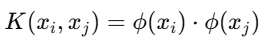

where

𝐾
(
𝑥
𝑖
,
𝑥
𝑗
)
 = Kernel function

ϕ(x) = mapping function to higher-dimensional space

**The Problem**

A Linear SVM works well only when data is linearly separable — that is, when you can draw a straight line (or hyperplane) to separate the classes.

But in many real-world problems, the data looks like this:

🔵🔴🔵🔴🔵🔴 (mixed in a circular or complex shape)

Clearly, no straight line can separate these classes properly.



**The Challenge**

Explicitly computing this higher-dimensional mapping is computationally expensive (and sometimes infinite-dimensional).

So instead of actually transforming the data, SVM uses the Kernel Trick.

Question 7: Write a Python program to train two SVM classifiers with Linear and RBF
kernels on the Wine dataset, then compare their accuracies.

In [1]:
# Import required libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Load the Wine dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target

# Standardize the features (important for SVM performance)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Create SVM with Linear Kernel
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)

# Create SVM with RBF Kernel
svm_rbf = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_rbf.fit(X_train, y_train)

# Evaluate both models
acc_linear = svm_linear.score(X_test, y_test)
acc_rbf = svm_rbf.score(X_test, y_test)

# Print the accuracies
print("Support Vector Machine (Linear Kernel) Accuracy: {:.2f}%".format(acc_linear * 100))
print("Support Vector Machine (RBF Kernel) Accuracy: {:.2f}%".format(acc_rbf * 100))

# Compare which performed better
if acc_linear > acc_rbf:
    print("\n✅ Linear Kernel performed better.")
elif acc_linear < acc_rbf:
    print("\n✅ RBF Kernel performed better.")
else:
    print("\n🤝 Both kernels performed equally well.")


Support Vector Machine (Linear Kernel) Accuracy: 96.30%
Support Vector Machine (RBF Kernel) Accuracy: 98.15%

✅ RBF Kernel performed better.


Question 8: What is the Naïve Bayes classifier, and why is it called "Naïve"?
 - The Naïve Bayes classifier is a simple, supervised machine learning algorithm based on Bayes' Theorem, used for tasks like text classification. It is called "naïve" because it makes a strong and often unrealistic assumption that all features are independent of each other, meaning the presence of one feature doesn't affect the presence of another, given the class.

**What is it?**

- It is a probabilistic classifier that calculates the probability of a data point belonging to a certain class based on the probabilities of its features.

- It is a "supervised" algorithm, meaning it learns from a labeled dataset to make predictions.

- It is particularly effective for high-dimensional data, such as text, making it useful for applications like spam filtering, sentiment analysis, and document categorization.

**Why is it called "naïve"?**

- The term "naïve" refers to the core assumption of conditional independence among its features.

- This assumption simplifies the complex, real-world dependencies that often exist between features in a dataset.

- For example, in a spam email classifier, the model assumes that the presence of the word "free" is independent of the presence of the word "winner," even though these words are frequently associated in spam.

- Despite this simplification, the algorithm often performs surprisingly well because the assumption, while often false, can be a reasonable approximation in many practical situations.

Question 9: Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes
- The main difference is the type of data each classifier handles: Gaussian Naïve Bayes is for continuous data that follows a normal distribution, Multinomial Naïve Bayes is for discrete counts (like word frequencies in text), and Bernoulli Naïve Bayes is for binary or boolean data (presence or absence of a feature). Each uses a different probability distribution to model its respective data type.

Naïve Bayes Overview
Naïve Bayes is a family of probabilistic classifiers based on Bayes’ Theorem, with the “naïve” assumption that features are independent given the class.

Bayes’ Theorem:
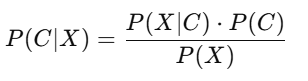

Where:

P(C∣X): Posterior probability of class 𝐶given data 𝑋

P(X∣C): Likelihood (probability of data given the class)

P(C): Prior probability of class

P(X): Evidence (probability of the data)
Different types of Naïve Bayes classifiers assume different distributions for
P(X∣C) (i.e., how features are distributed)
# Gaussian Naïve Bayes
- **Data Type**: Continuous
- **Assumption**: Features are continuous and follow a normal (Gaussian) distribution.
- **Use Case**: Applications like medical diagnosis, fraud detection, and weather prediction where features like height, weight, or temperature are measured.
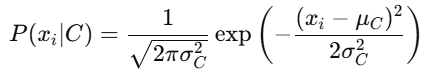

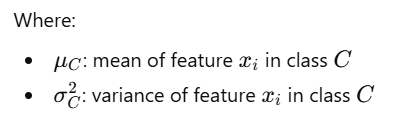


# Multinomial Naïve Bayes
- **Data Type**: Discrete counts
- **Assumption**: Features represent the number of times an event occurs, like word counts in a document.
- **Use Case**: Common in text classification, such as spam filtering or document categorization, where the frequency of words is a key feature. It's efficient for large datasets like text.

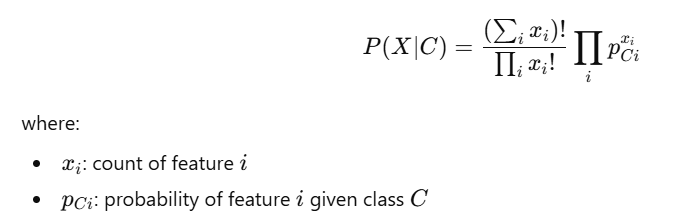

# Bernoulli Naïve Bayes
- **Data Type**: Binary or boolean
- **Assumption**: Features are binary, meaning they are either present (1) or absent (0).
- **Use Case**: Used when you want to know if a feature exists or not, not how many times it appears. It's also used in text classification for determining the presence or absence of a specific word in a document.

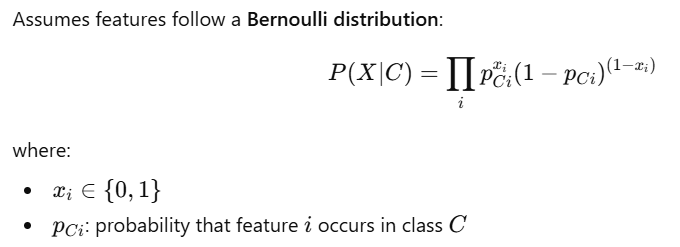

Question 10: Breast Cancer Dataset
Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer
dataset and evaluate accuracy.
Hint:Use GaussianNB() from sklearn.naive_bayes and the Breast Cancer dataset from
sklearn.datasets.

In [3]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Create the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Predict on the test data
y_pred = gnb.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Gaussian Naive Bayes Classifier Accuracy: {:.2f}%".format(accuracy * 100))

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

Gaussian Naive Bayes Classifier Accuracy: 94.74%

Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.89      0.93        64
      benign       0.94      0.98      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

